In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL3ZhbHVlLWF0LXJpc2s='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
# Noms des entreprises
from pprint import pprint
import numpy as np
entreprises = ["BNP", "SG"]

def PD(T,spread,Recouvrement):
    lambda_ = spread / (1 - Recouvrement)
    PD = 1 - np.exp(-lambda_*T)
    return PD,lambda_

spread_4Y = np.array([100, 120]) / 10000 # 100 et 120 points de base
spread_5Y = np.array([120, 150]) / 10000 # 120 et 150 points de base
tx_recouvrement = 0.4

proba_defaut_quatre = np.zeros(len(spread_4Y))
proba_defaut_cinq = np.zeros(len(spread_5Y))

for i in range(len(spread_4Y)) :
    proba_defaut_quatre[i],_ = PD(spread=spread_4Y[i],T = 4,Recouvrement=0.4)
    print(_)
    proba_defaut_cinq[i],_ = PD(spread=spread_5Y[i],T = 5,Recouvrement=0.4)
    print(_)

# Création d'un dictionnaire pour stocker les probabilités de défaut
probabilites_defaut = {}

# Remplir le dictionnaire
for i, entreprise in enumerate(entreprises):
    probabilites_defaut[entreprise] = {
        "4 ans": round(proba_defaut_quatre[i]*100,4),
        "5 ans": round(proba_defaut_cinq[i]*100,4)
    }

# Afficher le dictionnaire
pprint(probabilites_defaut)

0.016666666666666666
0.02
0.02
0.025
{'BNP': {'4 ans': np.float64(6.4493), '5 ans': np.float64(9.5163)},
 'SG': {'4 ans': np.float64(7.6884), '5 ans': np.float64(11.7503)}}


a_BNP =  5.8
b_BNP =  3.8666666666666676


Text(0.5, 1.0, 'Densité de probabilité du taux de recouvrement de BNP')

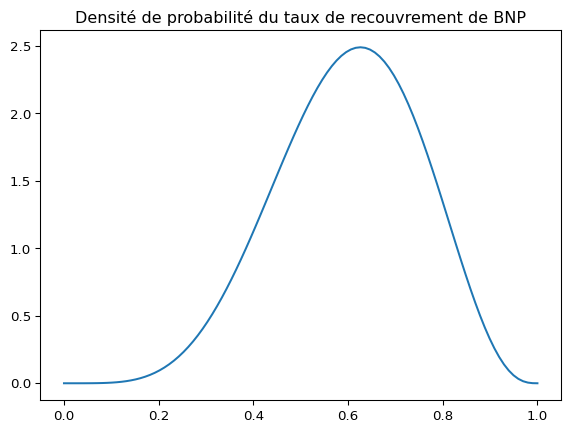

In [3]:
import numpy as np

tx_recouvrement_BNP = 0.6
vol_recouvrement_BNP = 0.15

def calibration_beta(mu,sigma):
    a = ((mu**2) * (1 - mu) / (sigma**2)) - mu
    b = ((mu**2) * (1 - mu)**2 / (mu*(sigma**2))) - (1-mu)
    return a,b

# def moment_beta(moyenne, variance):
#     alpha = (moyenne * (1 - moyenne) / variance**2 - 1) * moyenne
#     beta = (moyenne * (1 - moyenne) / variance**2 - 1) * (1 - moyenne)
#     return alpha, beta

a_BNP,b_BNP = calibration_beta(tx_recouvrement_BNP,vol_recouvrement_BNP)

print("a_BNP = ", a_BNP)
print("b_BNP = ", b_BNP)

# densité beta

from scipy.stats import beta
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
y_BNP = beta.pdf(x,a_BNP,b_BNP)

plt.plot(x,y_BNP)
plt.title("Densité de probabilité du taux de recouvrement de BNP")

a_SG =  0.708
b_SG =  1.652


Text(0.5, 1.0, 'Densité de probabilité du taux de recouvrement de BNP')

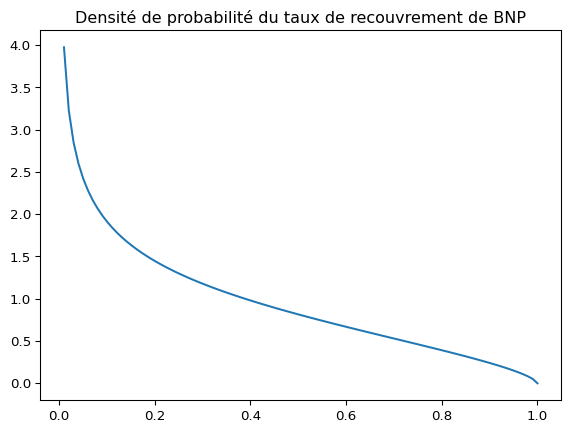

In [4]:
tx_recouvrement_SG = 0.3
vol_recouvrement_SG = 0.25


a_SG,b_SG = calibration_beta(tx_recouvrement_SG,vol_recouvrement_SG)

print("a_SG = ", a_SG)
print("b_SG = ", b_SG)

# densité beta
y_SG = beta.pdf(x,a_SG,b_SG)

plt.plot(x,y_SG)
plt.title("Densité de probabilité du taux de recouvrement de BNP")

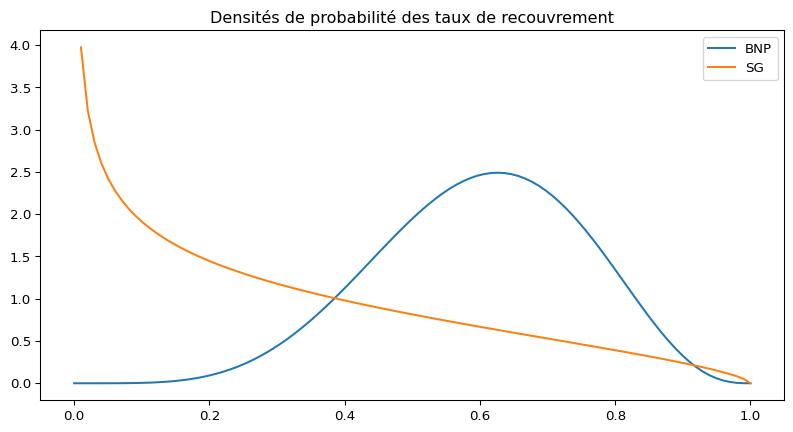

In [5]:
plt.figure(figsize=(10, 5))

plt.plot(x, y_BNP, label='BNP')
plt.plot(x, y_SG, label='SG')
plt.title("Densités de probabilité des taux de recouvrement")
plt.legend()
plt.show()

In [6]:
# read data.txt
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data_copules.txt', sep="\t")
data.head()

,BNP,SG
0,42.36,55.24
1,42.72,55.59
2,43.20,56.45
3,42.67,55.55
4,41.81,54.50


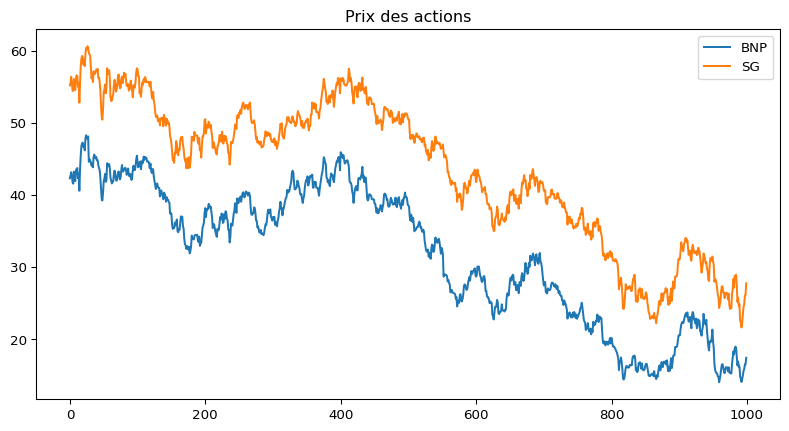

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['BNP'], label='BNP')
plt.plot(data['SG'], label='SG')
plt.title("Prix des actions")
plt.legend()
plt.show()

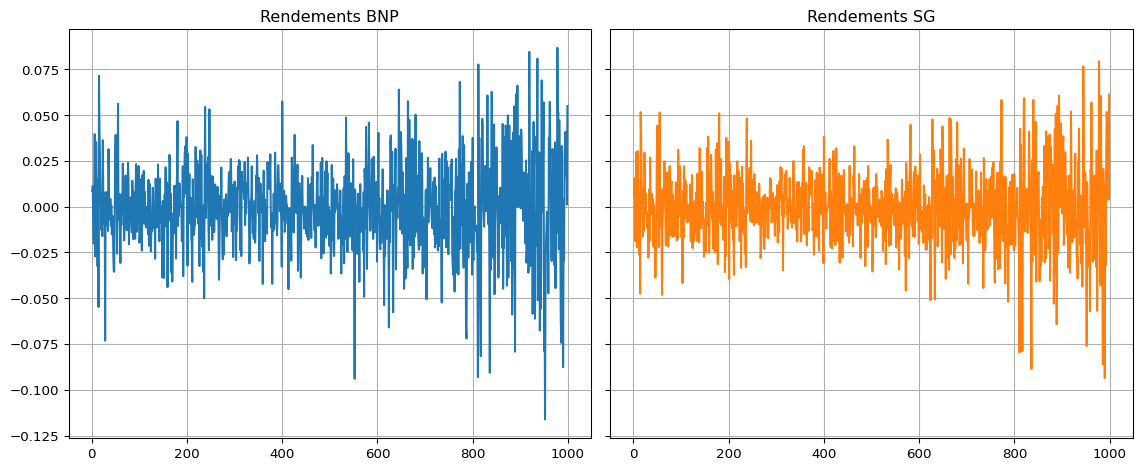

In [8]:
returns = pd.DataFrame()
returns["BNP"] = data["BNP"].pct_change().dropna()
returns["SG"] = data["SG"].pct_change().dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Premier sous-graphique : Rendements BNP
axes[0].plot(returns["BNP"], color='tab:blue')
axes[0].set_title("Rendements BNP")
axes[0].grid(True)

# Deuxième sous-graphique : Rendements SG
axes[1].plot(returns["SG"], color='tab:orange')
axes[1].set_title("Rendements SG")
axes[1].grid(True)

# Ajustement automatique pour éviter les chevauchements
plt.tight_layout()

# Affichage
plt.show()

In [9]:
returns.describe()

,BNP,SG
count,999.000000,999.000000
mean,-0.000590,-0.000473
std,0.024340,0.020690
min,-0.116199,-0.093616
25%,-0.013771,-0.011760
50%,-0.000358,-0.000547
75%,0.012605,0.011286
max,0.086786,0.079479


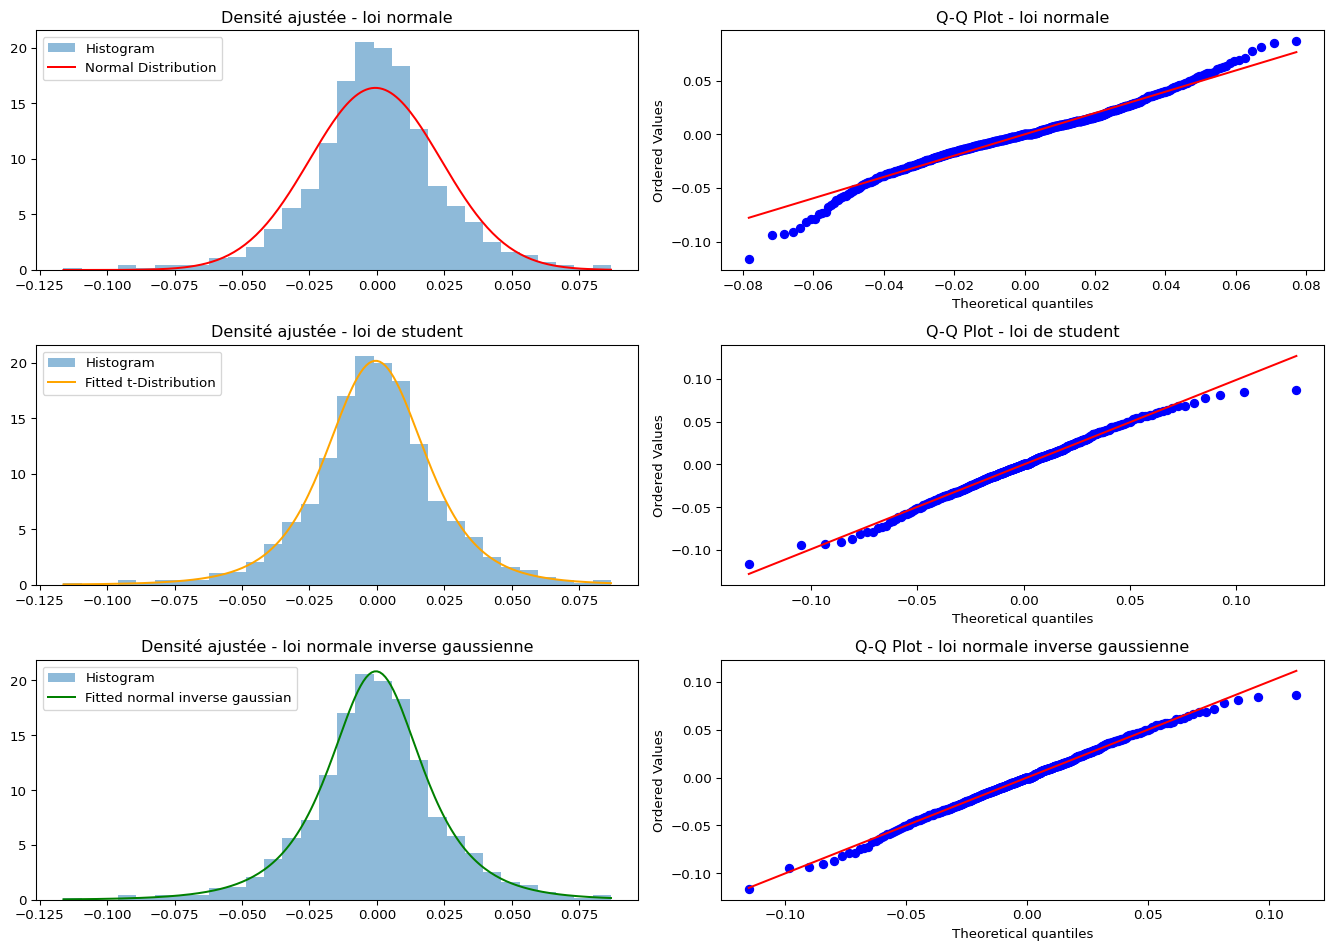

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Simulation de données pour l'exemple (remplace par tes données réelles)
data = returns["BNP"]

# Création de la figure et des axes pour 4 subplots (2 lignes, 2 colonnes)
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

######################## Loi normale ########################
params_norm = stats.norm.fit(data)

# Histogramme avec densité théorique de la loi normale (subplot 0,0)
xs = np.linspace(np.min(data), np.max(data), 200)
axs[0, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[0, 0].plot(xs, stats.norm.pdf(xs, *params_norm), label='Normal Distribution', color='red')
axs[0, 0].set_title('Densité ajustée - loi normale')
axs[0, 0].legend(loc='upper left')

# Q-Q plot (subplot 0,1)
stats.probplot(data, dist="norm",sparams=(params_norm), plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot - loi normale')

######################## Loi de student ########################

# Estimation des paramètres de la distribution de Student pour vos données.
params_std= stats.t.fit(data)

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[1, 0].plot(xs, stats.t.pdf(xs, *params_std), label='Fitted t-Distribution',color='orange')
axs[1, 0].set_title('Densité ajustée - loi de student')
axs[1, 0].legend(loc='upper left')

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="t", sparams=(params_std), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot - loi de student')

######################## Loi de Normal Inverse Gaussian ########################
params_nig = stats.norminvgauss.fit(data)

axs[2, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[2, 0].plot(xs, stats.norminvgauss.pdf(xs, *params_nig), label='Fitted normal inverse gaussian',color='green')
axs[2, 0].set_title('Densité ajustée - loi normale inverse gaussienne')
axs[2, 0].legend(loc='upper left')

# Q-Q plot avec une loi de NIG.
stats.probplot(data, dist="norminvgauss", sparams=(params_nig), plot=axs[2, 1])
axs[2, 1].set_title('Q-Q Plot - loi normale inverse gaussienne')

plt.tight_layout()

# Affichage des graphiques
plt.show()

U = pd.DataFrame(index=returns.index, columns=returns.columns)

U['BNP'] = stats.norminvgauss.cdf(data,*params_nig)

In [11]:
print(params_norm)
print(params_std)
print(params_nig)

(np.float64(-0.0005897932128196069), np.float64(0.024327449407557697))
(np.float64(4.605552436800593), np.float64(-0.00046153919290846087), np.float64(0.018734588738427177))
(np.float64(1.114374971099747), np.float64(-0.01637147555477723), np.float64(-0.00021011775496697913), np.float64(0.025828797181227353))


In [12]:
######## Test de kolmogorov-smirnov ########

ks_stat_norm, ks_p_value_norm = stats.kstest(data, 'norm', args=(params_norm))
ks_stat_std, ks_p_value_std = stats.kstest(data, 't', args=(params_std))
ks_stat_nig, ks_p_value_nig = stats.kstest(data, 'norminvgauss', args=(params_nig))

res = pd.DataFrame({
                "Statistic": [ks_stat_norm, ks_stat_std, ks_stat_nig],
                "p-value": [ks_p_value_norm, ks_p_value_std, ks_p_value_nig]
            }, index=["Normal", "Student","Normal Inverse Gaussian"])

print("="*50)
print("Test de Kolmogorov-Smirnov")
print("="*50)
print(res)
print("="*50)

Test de Kolmogorov-Smirnov
                         Statistic   p-value
Normal                    0.051878  0.008908
Student                   0.027225  0.441752
Normal Inverse Gaussian   0.026466  0.477953


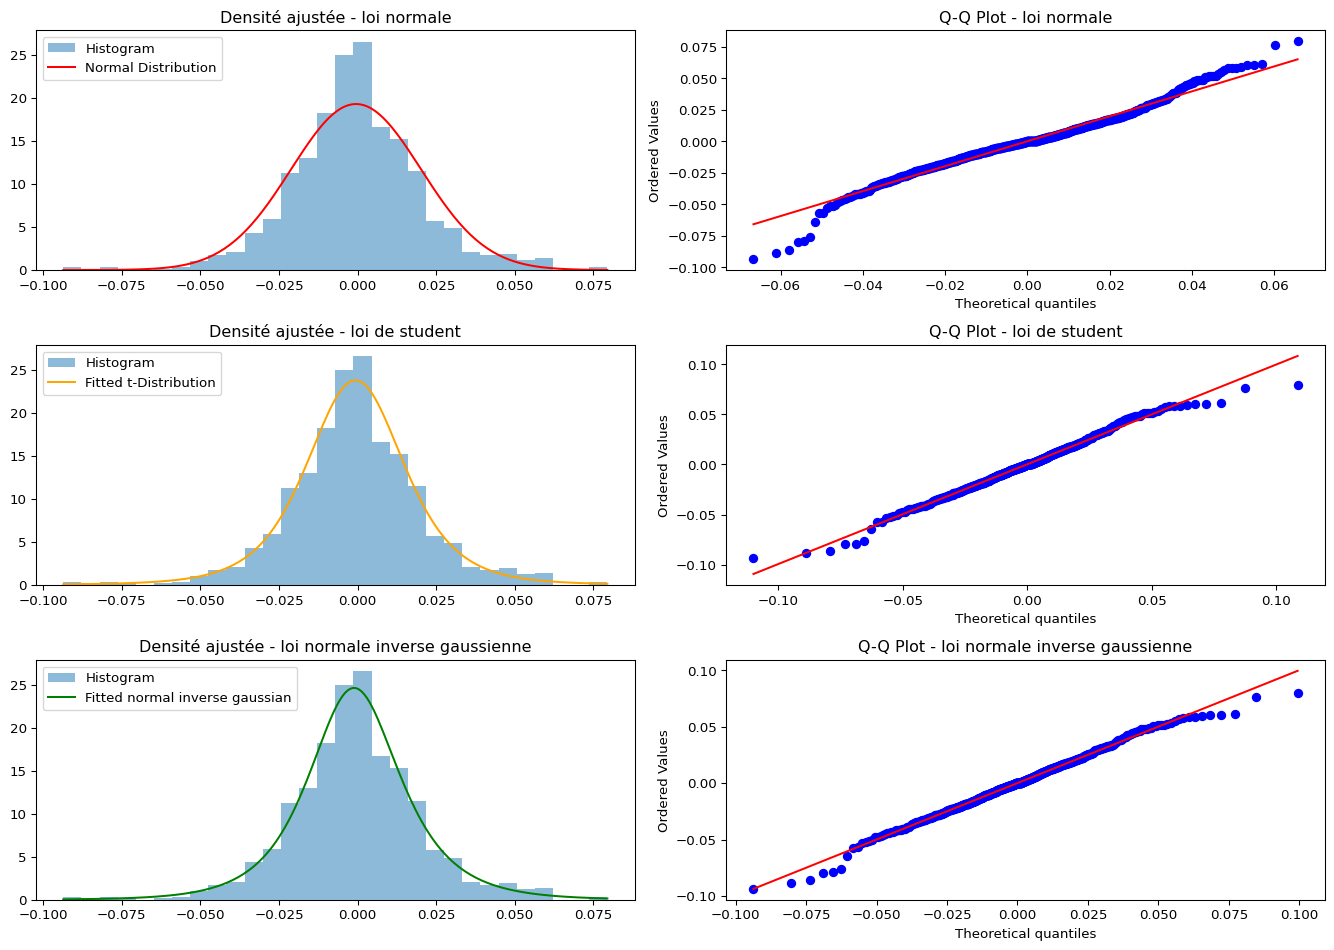

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Simulation de données pour l'exemple (remplace par tes données réelles)
data = returns["SG"]

# Création de la figure et des axes pour 4 subplots (2 lignes, 2 colonnes)
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

######################## Loi normale ########################
params_norm = stats.norm.fit(data)

# Histogramme avec densité théorique de la loi normale (subplot 0,0)
xs = np.linspace(np.min(data), np.max(data), 200)
axs[0, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[0, 0].plot(xs, stats.norm.pdf(xs, *params_norm), label='Normal Distribution', color='red')
axs[0, 0].set_title('Densité ajustée - loi normale')
axs[0, 0].legend(loc='upper left')

# Q-Q plot (subplot 0,1)
stats.probplot(data, dist="norm",sparams=(params_norm), plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot - loi normale')

######################## Loi de student ########################

# Estimation des paramètres de la distribution de Student pour vos données.
params_std= stats.t.fit(data)

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[1, 0].plot(xs, stats.t.pdf(xs, *params_std), label='Fitted t-Distribution',color='orange')
axs[1, 0].set_title('Densité ajustée - loi de student')
axs[1, 0].legend(loc='upper left')

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="t", sparams=(params_std), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot - loi de student')

######################## Loi de Normal Inverse Gaussian ########################
params_nig = stats.norminvgauss.fit(data)

axs[2, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[2, 0].plot(xs, stats.norminvgauss.pdf(xs, *params_nig), label='Fitted normal inverse gaussian',color='green')
axs[2, 0].set_title('Densité ajustée - loi normale inverse gaussienne')
axs[2, 0].legend(loc='upper left')

# Q-Q plot avec une loi de NIG.
stats.probplot(data, dist="norminvgauss", sparams=(params_nig), plot=axs[2, 1])
axs[2, 1].set_title('Q-Q Plot - loi normale inverse gaussienne')

plt.tight_layout()

# Affichage des graphiques
plt.show()

U['SG'] = stats.norminvgauss.cdf(data,*params_nig)

U = U.to_numpy()

In [14]:
######## Test de kolmogorov-smirnov ########

ks_stat_norm, ks_p_value_norm = stats.kstest(data, 'norm', args=(params_norm))
ks_stat_std, ks_p_value_std = stats.kstest(data, 't', args=(params_std))
ks_stat_nig, ks_p_value_nig = stats.kstest(data, 'norminvgauss', args=(params_nig))

res = pd.DataFrame({
                "Statistic": [ks_stat_norm, ks_stat_std, ks_stat_nig],
                "p-value": [ks_p_value_norm, ks_p_value_std, ks_p_value_nig]
            }, index=["Normal", "Student","Normal Inverse Gaussian"])

print("="*50)
print("Test de Kolmogorov-Smirnov")
print("="*50)
print(res)
print("="*50)

Test de Kolmogorov-Smirnov
                         Statistic   p-value
Normal                    0.047345  0.021967
Student                   0.025635  0.519206
Normal Inverse Gaussian   0.022462  0.685866


In [15]:
# Tableax avec tx de pearson, spearman et kendall

from scipy.stats import pearsonr, spearmanr, kendalltau

pearson = pearsonr(returns["BNP"], returns["SG"])
spearman = spearmanr(returns["BNP"], returns["SG"])
kendall = kendalltau(returns["BNP"], returns["SG"])

tableau_correlation = pd.DataFrame({
    "Pearson": pearson,
    "Spearman": spearman,
    "Kendall": kendall
}, index=["Coefficient", "p-value"])

tableau_correlation

,Pearson,Spearman,Kendall
Coefficient,8.646588e-01,8.409565e-01,6.690959e-01
p-value,2.383438e-300,3.609139e-268,9.880880e-220


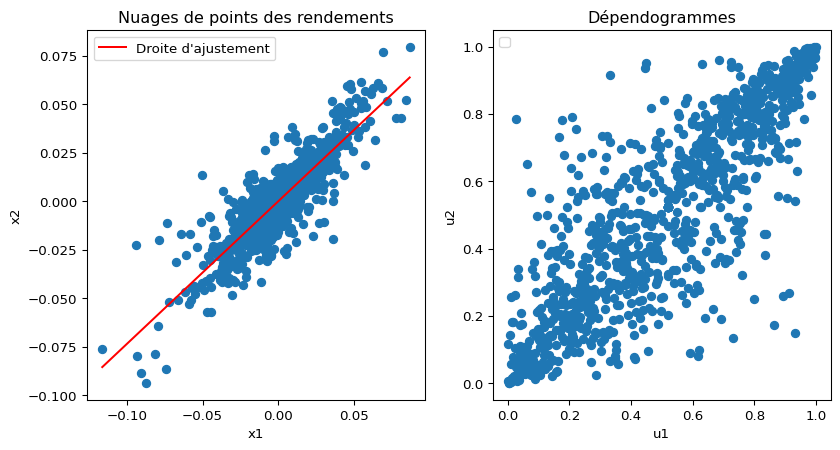

In [16]:
# Dependogramme
# Posons x1, u1 = BNP et x2, u2 = SG
import warnings
from scipy.stats import rankdata

warnings.filterwarnings("ignore")

# 1. Transformation en pseudo-observations
def pseudo_observations(X):
    """Transforme les données en pseudo-observations U dans [0,1]."""
    n, d = X.shape
    U = np.zeros((n, d))
    for j in range(d):
        U[:, j] = rankdata(X[:, j]) / (n + 1)  # Pour éviter les 1 stricts
    return U

X = returns.to_numpy()
u_obs = pseudo_observations(X)


plt.figure(figsize=(10, 5))
plt.subplot(1,2,1) # 1 ligne, 2 colonnes, premier graphique

# nuages de points des données BNP et SG
plt.scatter(returns["BNP"], returns["SG"], cmap="viridis")
# Ajout la droite qui s'ajuste aux données
plt.plot(np.unique(returns["BNP"]), np.poly1d(np.polyfit(returns["BNP"], returns["SG"], 1))(np.unique(returns["BNP"])), color="red", label="Droite d'ajustement")
plt.title("Nuages de points des rendements")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(False)

plt.subplot(1,2,2)
plt.scatter(u_obs[:,0], u_obs[:,1])
plt.title("Dépendogrammes")
plt.xlabel("u1")
plt.ylabel("u2")
plt.legend()
plt.grid(False)
plt.show()

In [17]:
from scipy.optimize import minimize
from statsmodels.distributions.copula.api import (
    GaussianCopula, StudentTCopula, ClaytonCopula, GumbelCopula, FrankCopula
)

def get_copula(copula_type, params):
    if copula_type == "gaussian":
        rho = params[0]
        return GaussianCopula(corr=np.array([[1, rho], [rho, 1]]))
    elif copula_type == "student":
        rho, nu = params
        return StudentTCopula(corr=np.array([[1, rho], [rho, 1]]), df=nu)
    elif copula_type == "clayton":
        theta = params[0]
        return ClaytonCopula(theta=theta)
    elif copula_type == "gumbel":
        theta = params[0]
        return GumbelCopula(theta=theta)
    elif copula_type == "frank":
        theta = params[0]
        return FrankCopula(theta=theta)
    else:
        raise ValueError(f"Copula type {copula_type} not supported")


# Log-vraisemblance négative pour estimation MLE
def negative_log_likelihood(params, U, copula_type):
    copula = get_copula(copula_type, params)
    log_likelihood = copula.logpdf(U)
    return -np.sum(log_likelihood)

# Ajustement de la copule (MLE)
def fit_copula(U, copula_type):
    if copula_type in ["gaussian", "gumbel", "clayton", "frank"]:
        if copula_type=="gaussian":
            x0 = [0.6]
        else:
            x0 = [3]
        bounds = [(1e-5, 10)] if copula_type != "gaussian" else [(-0.99, 0.99)]
    elif copula_type == "student":
        x0 = [0.6, 3]  # rho et df
        bounds = [(-0.99, 0.99), (2, 30)]

    result = minimize(negative_log_likelihood, x0, args=(U, copula_type), bounds=bounds, method='Nelder-Mead')

    if not result.success:
        raise RuntimeError(f"MLE failed for {copula_type} copula: {result.message}")

    return result.x

In [18]:
rho = fit_copula(u_obs, "gaussian")[0]

mat= np.array([[1, rho], [rho, 1]])
mat

array([[1.        , 0.86097656],
       [0.86097656, 1.        ]])

In [19]:
# # Simuler réalisation W suivant une loi normale centrée multivariée
# import scipy.stats as stats

# np.random.seed(0)
# n = 1000
# W = np.random.multivariate_normal([0, 0], mat, n)

# # Calculer U1 et U2
# U = np.zeros((n, 2))

# for i in range(n):
#     U[i,0] = stats.norm.cdf(W[i,0])
#     U[i,1] = stats.norm.cdf(W[i,1])


n = u_obs.shape[0]
_ = GaussianCopula(corr = rho).rvs(n)
u_est = pseudo_observations(_)

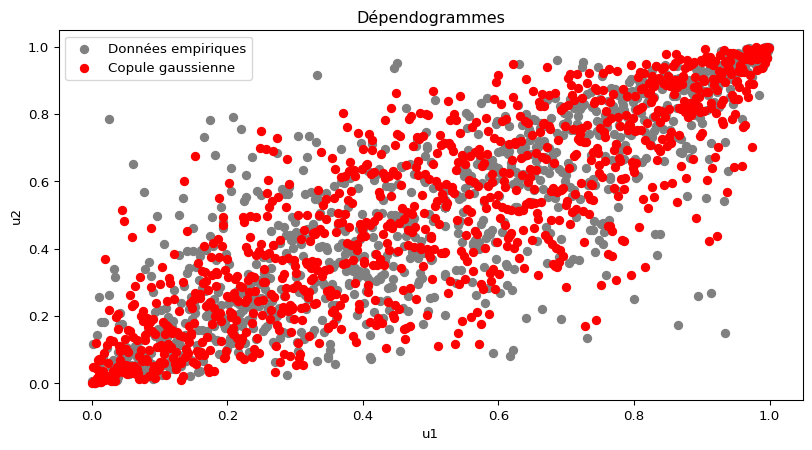

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(u_obs[:,0], u_obs[:,1], label = "Données empiriques", color = "grey")
plt.scatter(u_est[:,0], u_est[:,1], label = "Copule gaussienne", color = "red")
plt.title("Dépendogrammes")
plt.xlabel("u1")
plt.ylabel("u2")
plt.legend()
plt.grid(False)
plt.show()

(999,) (999,)


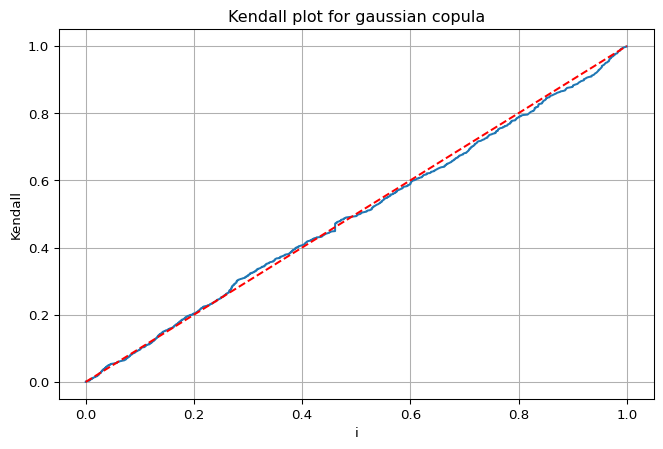

In [21]:
# Kendall plot
import numpy as np

def calculer_Hi_vect(U):
    n=len(U)
    H = np.zeros(n, dtype=int)
    # Comparaison de chaque paire une seule fois
    for i in range(n):
        # Créer des masques booléens pour les conditions
        cond1 = U[:, 0] <= U[i, 0]  # u_{1,j} <= u_{1,i}
        cond2 = U[:, 1] <= U[i, 1]  # u_{2,j} <= u_{2,i}

        # Appliquer les conditions et exclure le cas où i == j
        H[i] = (np.sum(np.logical_and(cond1, cond2)) - 1)

    return H/(len(U)-1)


def kendall_plot(U,S=1000,copula="gaussian",rho=None,nu=None,theta=None):

    H_i = calculer_Hi_vect(U)
    n = len(U)

    H_means = np.zeros((S, n)) # S lignes et n colonnes
    for s in range(S):
        if copula == 'gaussian':
            X_ = GaussianCopula(corr=rho).rvs(n)
        elif copula == 'student':
            X_ = StudentTCopula(df = nu, corr = rho).rvs(n)
        elif copula == "gumbel":
            X_= GumbelCopula(theta = theta).rvs(n)
        elif copula == "clayton":
            X_= ClaytonCopula(theta = theta).rvs(n)
        elif copula == "frank":
            X_= FrankCopula(theta = theta).rvs(n)
        U_=pseudo_observations(X_)
        H_means[s] = np.sort(calculer_Hi_vect(U_))

    H_mean = np.mean(H_means, axis=0) # axis=0 pour moyenne par colonne

    x,y = np.sort(H_i), np.sort(H_mean)
    print(x.shape, y.shape)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y)
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.title(f"Kendall plot for {copula} copula")
    plt.xlabel("i")
    plt.ylabel("Kendall")
    plt.grid(True)
    plt.show()

S=1000
kendall_plot(u_obs,S,copula="gaussian",rho=rho)

In [22]:
# Copule empirique Cn(u)
def empirical_copula_cdf(U, u):
    """Calcule la copule empirique Cn(u)."""
    return np.mean(np.all(U <= u, axis=1))

# Statistique de Cramér-von Mises
def cramer_von_mises_stat(U, copula):
    """Calcule la statistique de test Tn."""
    n = len(U)
    Tn = 0.0
    for i in range(n):
        u_i = U[i]
        Cn = empirical_copula_cdf(U, u_i)  # Copule empirique Cn(u_i)
        C_theta = copula.cdf([u_i])  # Copule théorique estimée Cθ(u_i)
        Tn += (Cn - C_theta) ** 2
    return Tn

# Test d’adéquation complet avec bootstrap paramétrique
def adequation_test(X, copula_type="gaussian", M=500):
    """
    Test d'adéquation de Genest & Rémillard (2008) pour une copule avec
    statistique de Cramér-von Mises et bootstrap paramétrique.
    """
    # Pseudo-observations
    U = pseudo_observations(X)
    n = len(U)

    # Estimation MLE de la copule sur les données
    params = fit_copula(U, copula_type)
    copula = get_copula(copula_type, params)

    # Calcul de la statistique observée Tn
    T_obs = cramer_von_mises_stat(U, copula)

    # Bootstrap paramétrique
    T_boot = []
    for _ in range(M):
        # 1. Simulation d’un échantillon sous la copule ajustée
        U_boot = copula.rvs(n)

        # 2. Ré-estimation de la copule sur U_boot
        params_boot = fit_copula(U_boot, copula_type)
        copula_boot = get_copula(copula_type, params_boot)

        # 3. Calcul de Tn pour cet échantillon bootstrap
        T_boot.append(cramer_von_mises_stat(U_boot, copula_boot))

    # Calcul de la p-value (proportion des T_boot supérieurs à T_obs)
    p_value = np.mean(np.array(T_boot) >= T_obs)

    return {
        "copula_type": copula_type,
        "params": params,
        "T_obs": T_obs,
        "p_value": p_value
    }

from pprint import pprint
result_gaussian = adequation_test(X, copula_type="gaussian")
pprint(result_gaussian)

{'T_obs': np.float64(0.054564311624880506),
 'copula_type': 'gaussian',
 'p_value': np.float64(0.876),
 'params': array([0.86097656])}


In [23]:
rho,nu = fit_copula(u_obs, "student")

print("rho = ", rho)
print("nu = ", nu)

rho =  0.8496143388748167
nu =  2.0


In [24]:
n = u_obs.shape[0]
_ = StudentTCopula(corr = rho, df=nu).rvs(n)
u_est = pseudo_observations(_)

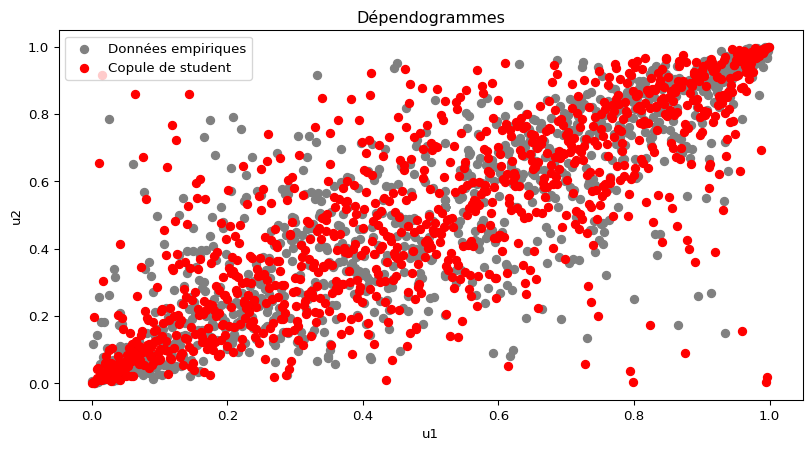

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(u_obs[:,0], u_obs[:,1], label = "Données empiriques", color = "grey")
plt.scatter(u_est[:,0], u_est[:,1], label = "Copule de student", color = "red")
plt.title("Dépendogrammes")
plt.xlabel("u1")
plt.ylabel("u2")
plt.legend()
plt.grid(False)
plt.show()

(999,) (999,)


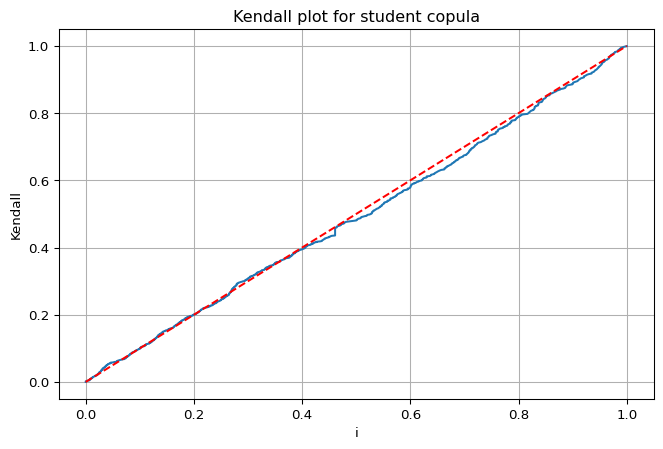

In [26]:
kendall_plot(u_obs,S,copula="student",rho=rho,nu=nu)

In [27]:
from pprint import pprint
result_std = adequation_test(X, copula_type="student") # ATTENTION DIFFICULTE POUR ESSTIMER COPULE STUDENT
pprint(result_std)

{'T_obs': np.float64(0.05938107549673791),
 'copula_type': 'student',
 'p_value': np.float64(0.808),
 'params': array([0.84961434, 2.        ])}


In [28]:
theta = fit_copula(u_obs, "clayton")[0]

print("theta = ", theta)

theta =  2.4768310546874988


In [29]:
n = u_obs.shape[0]
_ = ClaytonCopula(theta= theta).rvs(n)
u_est = pseudo_observations(_)

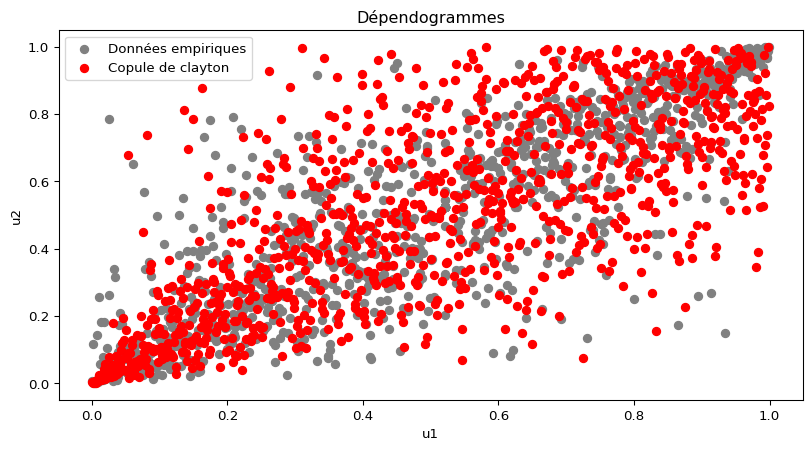

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(u_obs[:,0], u_obs[:,1], label = "Données empiriques", color = "grey")
plt.scatter(u_est[:,0], u_est[:,1], label = "Copule de clayton", color = "red")
plt.title("Dépendogrammes")
plt.xlabel("u1")
plt.ylabel("u2")
plt.legend()
plt.grid(False)
plt.show()

(999,) (999,)


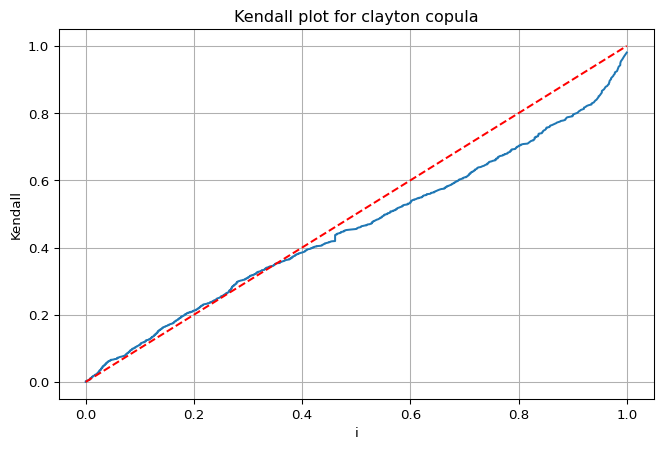

In [31]:
S=1000
kendall_plot(u_obs,S,copula="clayton",theta=theta)

In [32]:
from pprint import pprint
result_clayton= adequation_test(X, copula_type="clayton") 
pprint(result_clayton)

{'T_obs': array([0.86477661]),
 'copula_type': 'clayton',
 'p_value': np.float64(0.006),
 'params': array([2.47683105])}


In [33]:
theta = fit_copula(u_obs, "gumbel")[0]

print("theta = ", theta)

theta =  2.9939208984374996


In [34]:
n = u_obs.shape[0]
_ = GumbelCopula(theta= theta).rvs(n)
u_est = pseudo_observations(_)

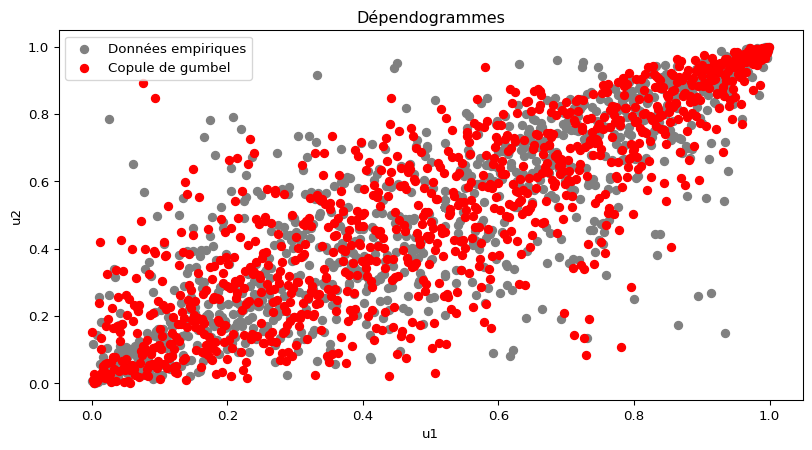

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(u_obs[:,0], u_obs[:,1], label = "Données empiriques", color = "grey")
plt.scatter(u_est[:,0], u_est[:,1], label = "Copule de gumbel", color = "red")
plt.title("Dépendogrammes")
plt.xlabel("u1")
plt.ylabel("u2")
plt.legend()
plt.grid(False)
plt.show()

(999,) (999,)


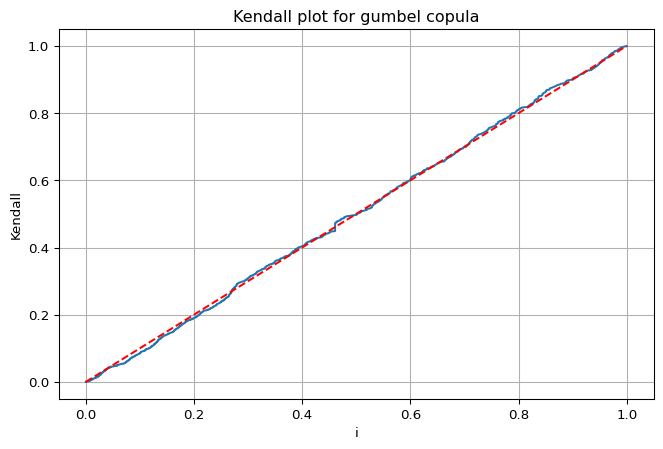

In [36]:
kendall_plot(u_obs,S,copula="gumbel",theta=theta)

In [37]:
from pprint import pprint
result_gumbel = adequation_test(X, copula_type="gumbel") 
pprint(result_gumbel)

{'T_obs': array([0.03485682]),
 'copula_type': 'gumbel',
 'p_value': np.float64(0.974),
 'params': array([2.9939209])}


In [38]:
theta = fit_copula(u_obs, "frank")[0]

print("theta = ", theta)

theta =  10.0


In [39]:
n = u_obs.shape[0]
_ = FrankCopula(theta= theta).rvs(n)
u_est = pseudo_observations(_)

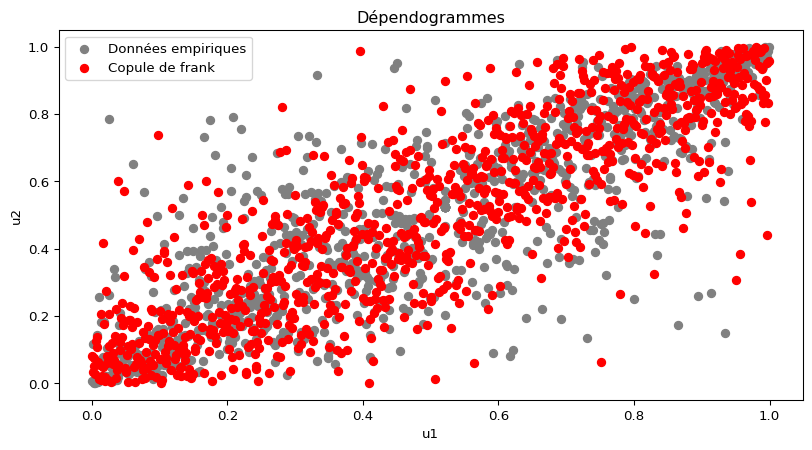

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(u_obs[:,0], u_obs[:,1], label = "Données empiriques", color = "grey")
plt.scatter(u_est[:,0], u_est[:,1], label = "Copule de frank", color = "red")
plt.title("Dépendogrammes")
plt.xlabel("u1")
plt.ylabel("u2")
plt.legend()
plt.grid(False)
plt.show()

(999,) (999,)


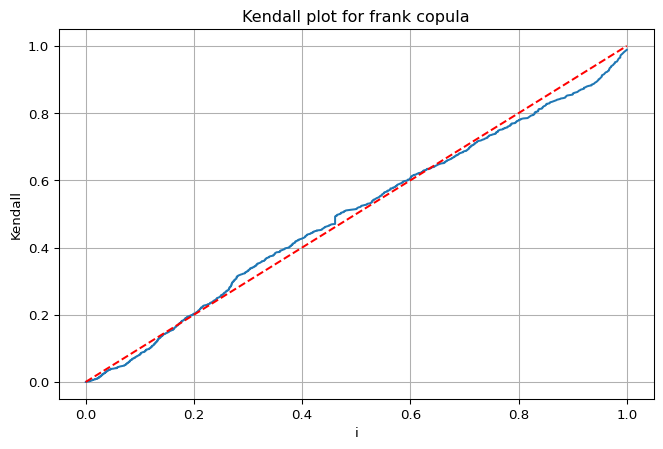

In [41]:
kendall_plot(u_obs,S,copula="frank",theta=theta)

In [42]:
from pprint import pprint
result_frank = adequation_test(X, copula_type="frank") 
pprint(result_frank)

{'T_obs': array([0.12454173]),
 'copula_type': 'frank',
 'p_value': np.float64(0.466),
 'params': array([10.])}


In [43]:
dict_list = [result_gaussian, result_std, result_clayton, result_gumbel, result_frank]

# Convert to DataFrame
df = pd.DataFrame(dict_list)
df

,copula_type,params,T_obs,p_value
0,gaussian,[0.8609765625000002],0.054564,0.876
1,student,"[0.8496143388748167, 2.0]",0.059381,0.808
2,clayton,[2.4768310546874988],[0.8647766118220173],0.006
3,gumbel,[2.9939208984374996],[0.034856823632549765],0.974
4,frank,[10.0],[0.12454172887238589],0.466


In [44]:
# Calcul de la credit var par monte carlo


def credit_var(params_R1,params_R2,lambda_1,lambda_2,EAD,params,S,tau,copula_type="gumbel",alpha=0.99):
    """
        Cette fonction est Var de niveau alpha qui estime la perte maximale sur l'horizon tau
        et retourne le quantile de niveau 99% pour dim=2.
    """

    copula = get_copula(copula_type, params)
    U = copula.rvs(S)
    a1,b1 = params_R1
    a2,b2 = params_R2

    # Générer des échantillons pour lgd_bnp et lgd_sg avec la loi Beta, vectorisée
    LGD1 = 1 - np.random.beta(a1, b1, S)
    LGD2 = 1 - np.random.beta(a2, b2, S)


    # Simuler tau_bnp et tau_sg en utilisant la fonction de répartition inverse de la loi exponentielle
    tau_bnp = stats.expon.ppf(U[:, 0], scale=1/lambda_1)
    tau_sg = stats.expon.ppf(U[:, 1], scale=1/lambda_2)

    # Calculer les pertes, vectorisée
    L1 = np.where(tau_bnp < tau, LGD1 * EAD, 0)
    L2 = np.where(tau_sg < tau, LGD2 * EAD, 0)

    # Somme des pertes
    L = L1 + L2

    # Calculer et retourner le quantile de niveau 99%
    return np.percentile(L, alpha * 100)

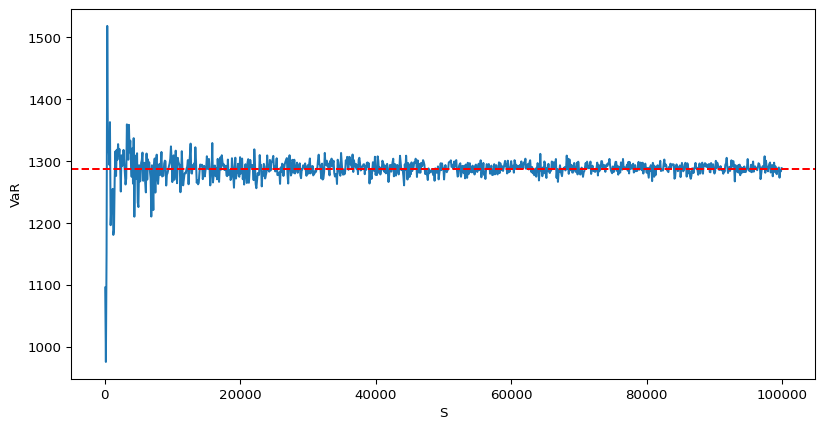

In [45]:
# Tracer la courbe de la VaR en fonction de S

S_values = np.arange(100, 100000, 100)
params = fit_copula(U, "gumbel")
EAD = 1000
tau = 4
def PD(T,spread,Recouvrement):
    lambda_ = spread / (1 - Recouvrement)
    PD = 1 - np.exp(-lambda_*T)
    return PD,lambda_

_,lambda_1 = PD(4,spread_4Y[0],tx_recouvrement)
_,lambda_2 = PD(4,spread_5Y[0],tx_recouvrement)

params_R1 = a_BNP,b_BNP
params_R2 = a_SG,b_SG
VaR_values = [credit_var(params_R1=params_R1,params_R2=params_R2, lambda_1=lambda_1, \
                         lambda_2=lambda_2, EAD=EAD, params=params, S=S, tau=tau) for S in S_values]

# Je veux tracer une droite horizontale pour la mediane de la VaR et mettre ça valeur sur l'axe des ordonnées
plt.figure(figsize=(10, 5))
plt.plot(S_values, VaR_values)
plt.axhline(np.mean(VaR_values), color="red", linestyle="--")
plt.xlabel("S")
plt.ylabel("VaR")
plt.grid(False)
plt.show()

In [46]:
np.mean(VaR_values)

np.float64(1287.6977245444875)

In [47]:
S = 40000
credit_var(params_R1=params_R1,params_R2=params_R2, lambda_1=lambda_1, \
                         lambda_2=lambda_2, EAD=EAD, params=params, S=S, tau=tau)

np.float64(1305.2995331560742)